In [ ]:
#Importing the Required Packages
using Flux.Tracker
using Flux
using Flux.Tracker: grad, update!
using Random
using Flux,DiffEqFlux, DifferentialEquations, Plots
using Flux.Tracker
using Flux.Optimise

we print the values of predict_rd2()=
retcode: Success
Interpolation: 1st order linear
t: [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
u: 

Internal error: encountered unexpected error in runtime:
InterruptException()
jl_mutex_unlock at /Users/osx/buildbot/slave/package_osx64/build/src/./locks.h:138 [inlined]
jl_typeinf_end at /Users/osx/buildbot/slave/package_osx64/build/src/gf.c:2568
typeinf_ext at ./compiler/typeinfer.jl:575
typeinf_ext at ./compiler/typeinfer.jl:611
jfptr_typeinf_ext_1.clone_1 at /Applications/Julia-1.0.app/Contents/Resources/julia/lib/julia/sys.dylib (unknown line)
jl_apply at /Users/osx/buildbot/slave/package_osx64/build/src/./julia.h:1537 [inlined]
jl_apply_with_saved_exception_state at /Users/osx/buildbot/slave/package_osx64/build/src/rtutils.c:257
jl_type_infer at /Users/osx/buildbot/slave/package_osx64/build/src/gf.c:275
jl_compile_method_internal at /Users/osx/buildbot/slave/package_osx64/build/src/gf.c:1786
jl_fptr_trampoline at /Users/osx/buildbot/slave/package_osx64/build/src/gf.c:1830
predict_rd2 at ./In[1]:21
jl_fptr_trampoline at /Users/osx/buildbot/slave/package_osx64/build/src/gf.c:1831


Array{Tracker.TrackedReal{Float64},1}[[1.0, 1.0], [1.06108, 0.821084], [1.14403, 0.679053], [1.24917, 0.566893], [1.37764, 0.478813], [1.53123, 0.410155], [1.71227, 0.357262], [1.92358, 0.317348], [2.16839, 0.288387], [2.45025, 0.269054], [2.77285, 0.258711]]
We test the run of the perceptron, mymodel4([0.5,0.5])
retcode: Success
Interpolation: 1st order linear
t: [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
u: Array{Tracker.TrackedReal{Float64},1}[[1.0, 1.0], [1.06108, 0.821084], [1.14403, 0.679053], [1.24917, 0.566893], [1.37764, 0.478813], [1.53123, 0.410155], [1.71227, 0.357262], [1.92358, 0.317348], [2.16839, 0.288387], [2.45025, 0.269054], [2.77285, 0.258711]]
Example value of loss function. Value of loss4([0.5,0.5],[1.0,1.0])=21.832968992313013 (tracked)

Initial plot of solutions and total error n





22.378793217120826 (tracked)

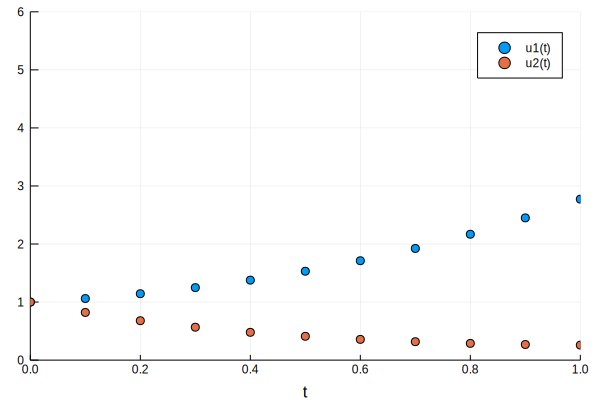

Value of totalloss4() in this iteration=
Value of parameter p=[1.5, 1.0, 3.0, 1.0] (tracked)
starting training......












15.288928359796802 (tracked)

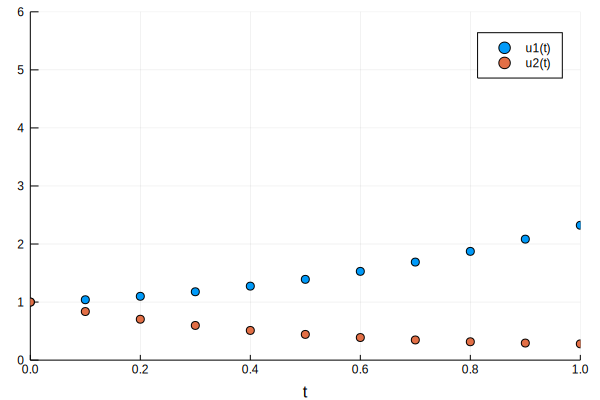

Value of totalloss4() in this iteration=


10.17906215446681 (tracked)

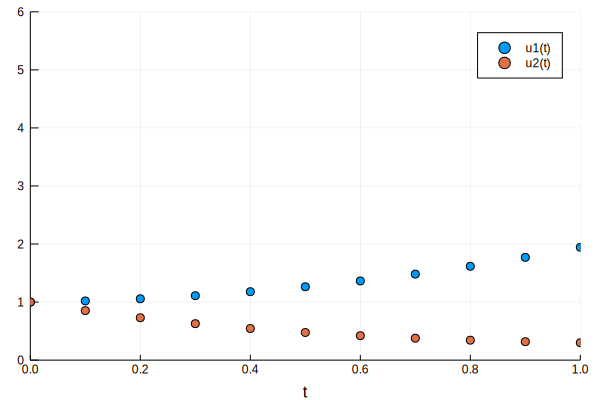

Value of totalloss4() in this iteration=


6.582187551123701 (tracked)

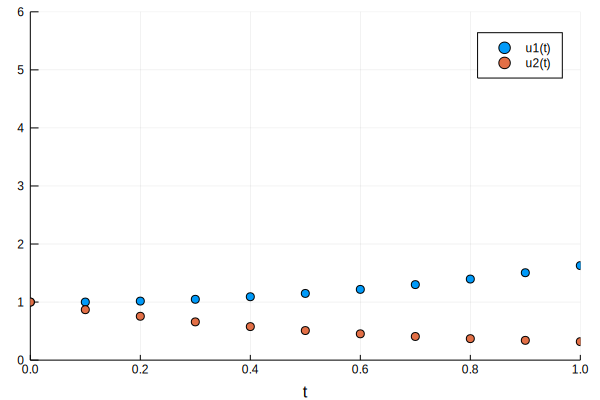

Value of totalloss4() in this iteration=


4.106345754298496 (tracked)

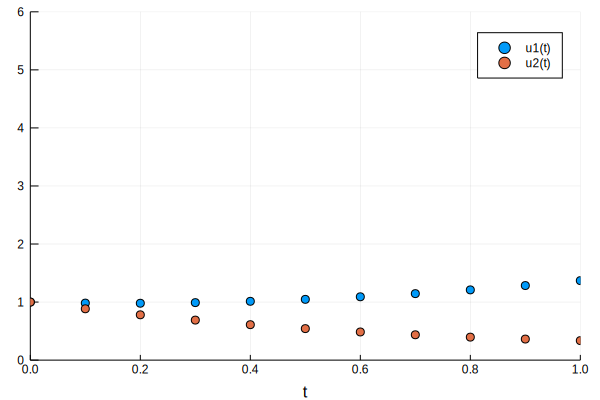

Value of totalloss4() in this iteration=


2.4427588719195095 (tracked)

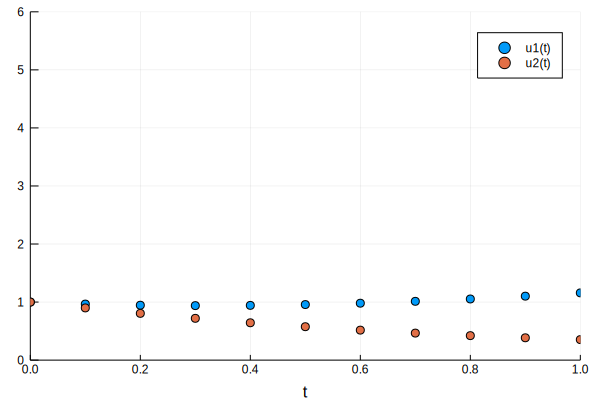

Value of totalloss4() in this iteration=


1.3591300927803591 (tracked)

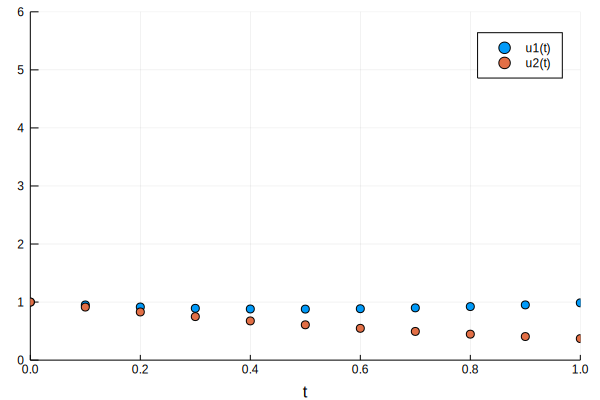

Value of totalloss4() in this iteration=


0.685725276316633 (tracked)

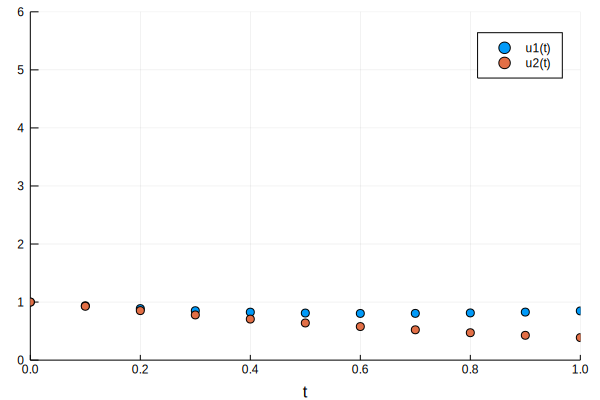

Value of totalloss4() in this iteration=


0.3002522415981568 (tracked)

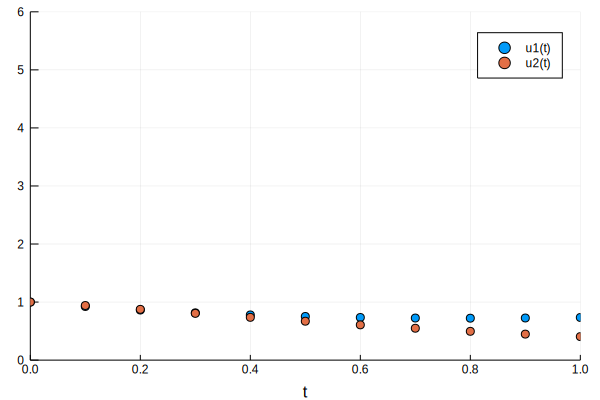

Value of totalloss4() in this iteration=


0.11471912620132416 (tracked)

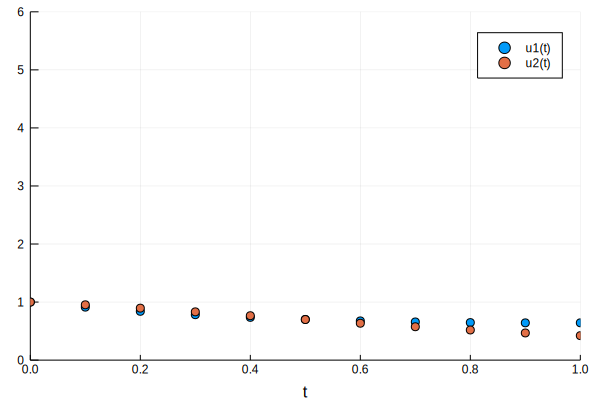

Value of totalloss4() in this iteration=


0.06528655944582885 (tracked)

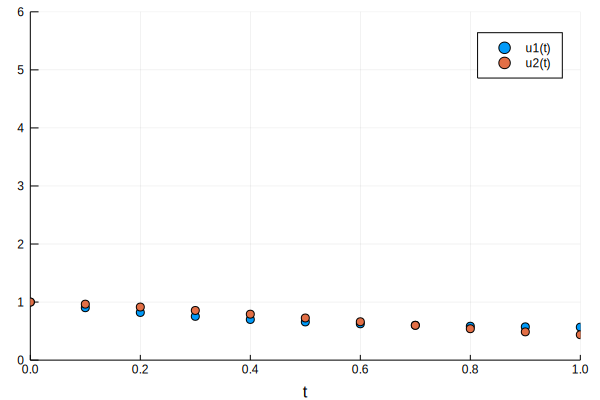

Value of totalloss4() in this iteration=

New Value of parameter p=[0.732316, 1.78765, 2.11769, 1.84585] (tracked)
New value of totalloss4()=

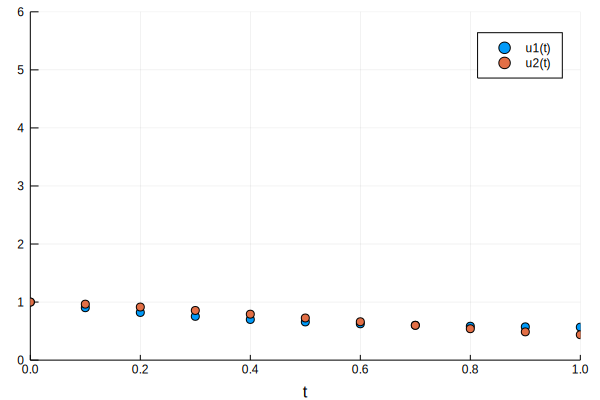

0.06528655944582885 (tracked)

Plot of solutions with final parameter

END


In [1]:
# THIS MODEL IS FOR A NEURAL NETWORK WITH A ODE LAYER AND INPUT TO THE LAYER BEING THE PARAMETERS OF IT
#THIS RUNS CORRECTLY!
using Flux, DiffEqFlux, DifferentialEquations, Plots
###########################################################
## Setup ODE to optimize
function lotka_volterra(du,u,p,t)
  x, y = u
  α, β, δ, γ = p
  du[1] = dx = α*x - β*x*y
  du[2] = dy = -δ*y + γ*x*y
end
u0 =Float32[1.0,1.0]
tspan = (0.0,1.0)
p = [1.5,1.0,3.0,1.0]
prob = ODEProblem(lotka_volterra,u0,tspan,p)
####################################################### 
#First we create a solution of the Diff Eq that accepst parameters
#using the forward solution method diff_rd
p = Flux.param([1.5,1.0,3.0,1.0])#We set the parameters to track
function predict_rd2() #THis call the differential equation solver 
  diffeq_rd(p,prob,Tsit5(),saveat=0.1) 
end
println("we print the values of predict_rd2()=")
println(predict_rd2())#We check the format of the solution
#####################################################################
mymodel4 = Chain(#we create the perceptron with the ODE layer based on parameters
  Dense(2,3,σ),
   p->predict_rd2()
)
###################################################################
println("We test the run of the perceptron, mymodel4([0.5,0.5])")
println(mymodel4([0.5,0.5]))#We test that the perceptron is well defined
#The perceptron inputs and array of two values adn outputs the entire solution of the 
#differential equation for the generated parameters of the system.
#The goal here is to optimize the parameters of the solution of the ODE so that the two solutions
#will converge to the constant function 1.
############################################################
#We now calculate the error between the values generated
#by the perceptron and the constant functions 1. Seems like the loss function must take 2 parameters
# so we make our function depend on the second parameter although there is no use for the second one
#since we want the solutions of the ODE to converge to the constant functions 1. The function
# loss will calculate the error bewtween the constant function 1 and each one of the 
#two solutions of the ODE at the input values of 0.0, 0.1, 0.2,...1.0.
function loss4(x,y)
    T=0;
    for i in 1:11
        T=T+(mymodel4(x)[i][1]-mymodel4(x)[i][2])^2;
    end
    return T
end
println("Example value of loss function. Value of loss4([0.5,0.5],[1.0,1.0])=",loss4([0.5,0.5],[1.0,1.0]))# We ilustrate the run of the loss4 function
###########################################################
#We proceed to the training of the peceptron and plotting of 
#solutions
# We begin by creating the training data. The format is weird but this is what worked
newx=[[0.1,0.1],[0.2,0.2],[0.3,0.3],[0.4,0.4],[0.5,0.5],[0.6,0.6],[0.7,0.7],[0.8,0.8],[0.9,0.9],[1.0,1.0]]
newy=[[1,1],[1,1],[1,1],[1,1],[1,1],[1,1],[1,1],[1,1],[1,1],[1,1]]#This part of the data is never used 
data1 =[(newx[1], newy[1]),(newx[2],newy[2]),(newx[3],newy[3]),(newx[4],newy[4]),
(newx[5],newy[5]), (newx[6],newy[6]),(newx[7],newy[7]),(newx[8],newy[8]),
(newx[9],newy[9]),(newx[10],newy[10])]
println()
function totalloss4()#This is the total error function. It is not used in the training, but just to calculate the total error
    T=0;
    for i in 0:40
        T=T+loss4([i*0.1,i*0.1],[1.0,1.0]);
    end
    return T/40
end
opt = ADAM(0.1)#This is the optimization parameter
cb = function () #callback function to observe training
    println("Value of totalloss4() in this iteration=")
    display(totalloss4())
  # using `remake` to re-create our `prob` with current parameters `p`
   display(scatter(solve(remake(prob,p=Flux.data(p)),Tsit5(),saveat=0.1),ylim=(0,6)))
end
# Display the ODE with the initial parameter values.
println("Initial plot of solutions and total error n\n\n\n") 
cb()
#Display values of parameters before and after training
println("Value of parameter p=", p)
println("starting training......\n\n\n\n\n\n\n\n\n")
println()
Flux.train!(loss4, [p],data1 , opt, cb=cb)
println()
println("New Value of parameter p=", p)
println("New value of totalloss4()=",totalloss4())
println()
println("Plot of solutions with final parameter\n")
display(scatter(solve(remake(prob,p=Flux.data(p)),Tsit5(),saveat=0.1),ylim=(0,6)))
println("END")